### Libraries

In [1]:
from sklearn import preprocessing
import requests
import pandas as pd

url1 = "https://www.xdeamx.com/reto3/process.php"
url2 = "https://www.xdeamx.com/reto3/general.php"


### Download data

In [2]:
def _http_rq_post(url):
    headers = {'accept': 'text/html'}
    s = requests.Session()
    data = {'numero': '4004'}
    response = s.post(url=url, headers=headers, data=data)
    return s, response


def _http_rq_get(url, session):
    headers = {'accept': 'text/html'}
    response = session.get(url=url, headers=headers)
    return response


def _save_html(response, name=""):
    f = open(name+"htmldata.html", "w")
    f.write(response.text)
    f.close()


### Reading data

In [3]:
r2 = _http_rq_get(url2, _http_rq_post(url1)[0])

_save_html(r2, "general")

file_name = 'generalhtmldata.html'
df = pd.read_html(file_name)

In [8]:
file_name = 'generalhtmldata.html'
df = pd.read_html(file_name)
df_runners = df[0]

### Showing General

In [10]:
df_runners.columns

Index(['No Corredor', 'Nombre', 'Género', 'País', 'Dis. Total',
       'Tiempo Total (Minutos)', 'Elevación total', 'No de vueltas'],
      dtype='object')

In [11]:
df_runners

,No Corredor,Nombre,Género,País,Dis. Total,Tiempo Total (Minutos),Elevación total,No de vueltas
0,6048,CARLOS CRUZ,COLOMBIA,COLOMBIA,162,1200,0,27
1,1,JANCY MAZA,M�XICO,MÉXICO,155,1064,46,31
2,5066,RODIL MELITÓN ERRIVARES LAUREANO,PER�,PERÚ,150,1300,0,30
3,6049,ELIAS BUITRAGO BOLIVAR,COLOMBIA,COLOMBIA,144,1065,0,24
4,5102,FEDERICO CARDONA ESCOBAR,COLOMBIA,COLOMBIA,135,937,805,27
...,...,...,...,...,...,...,...,...
203,4083,CAROLINA GARRIDO,COLOMBIA,COLOMBIA,4,44,12,1
204,4055,MILTON LAMPREA,COLOMBIA,COLOMBIA,4,46,86,1
205,4190,DIANA MARCELA RIVERA,COLOMBIA,COLOMBIA,4,55,0,1
206,4196,KELLY PATRICIA CHALÁ CÓRDOBA,COLOMBIA,COLOMBIA,4,60,0,1


### Parsing Data

In [12]:
df_runners['duration-minutes'] = pd.to_numeric(df_runners['Tiempo Total (Minutos)'][:206])
df_runners['laps'] = pd.to_numeric(df_runners['No de vueltas'][:206])
df_runners['elevation'] = pd.to_numeric(df_runners['Elevación total'][:206])
df_runners['distance'] = pd.to_numeric(df_runners['Dis. Total'][:206])
df_runners['category'] = df_runners['distance']/df_runners['laps']
df_runners = df_runners[0:255]

### Plotting Data

<AxesSubplot:title={'center':'Total-distance running'}, xlabel='Runner Id', ylabel='Kms'>

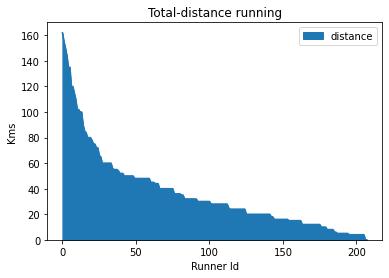

In [15]:
df1 = df_runners[['distance']]
df1.plot.area(xlabel='Runner Id', ylabel="Kms", title='Total-distance running')

<AxesSubplot:title={'center':'Elevation per Runner'}, xlabel='Runner Id', ylabel='Kms'>

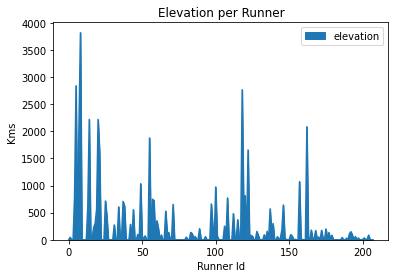

In [16]:
df2 = df_runners[['elevation']]
df2.plot.area(xlabel='Runner Id', ylabel="Kms", title='Elevation per Runner')

<AxesSubplot:title={'center':'Runners X Country'}, ylabel='Country'>

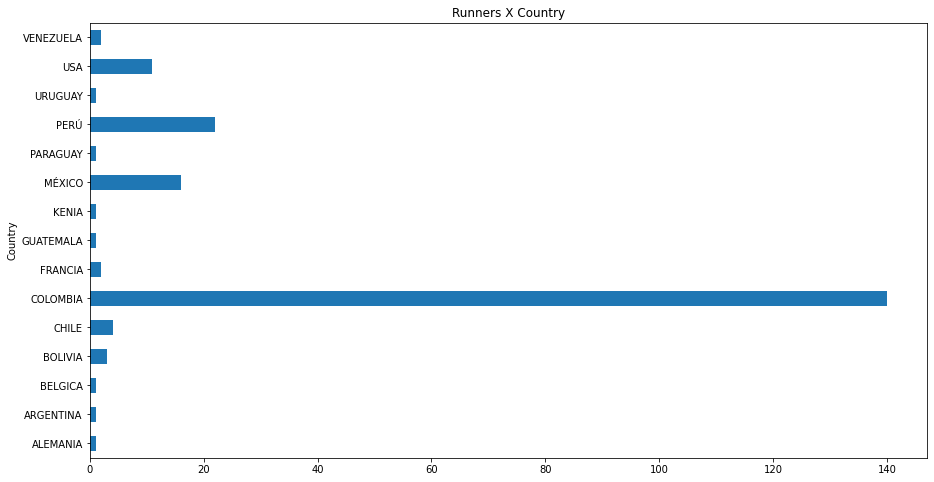

In [17]:
df3 = df_runners[df_runners['País'] != 'País'].groupby(['País']).count()['Nombre']
df3.plot.barh(xlabel='Country', ylabel="# Runners", title='Runners X Country', figsize=(15, 8))

<AxesSubplot:title={'center':'Distance,Elevation X Category (4k, 5k, 6k)'}, xlabel='category'>

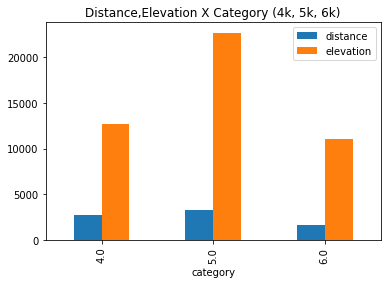

In [18]:
df5 = df_runners.groupby(['category']).sum()
df5[['distance', 'elevation']].plot.bar(title='Distance,Elevation X Category (4k, 5k, 6k)')

<AxesSubplot:title={'center':'box'}>

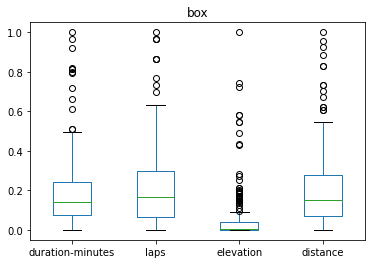

In [20]:
df_metrics = df_runners[['duration-minutes', 'laps', 'elevation', 'distance']]
x = df_metrics
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_metrics_n = pd.DataFrame(x_scaled)
df_metrics_n.columns = ['duration-minutes', 'laps', 'elevation', 'distance']
df_metrics_n.index = df_runners['category']
df_metrics_n.plot.box(title='box')

<AxesSubplot:title={'center':'box'}, ylabel='Density'>

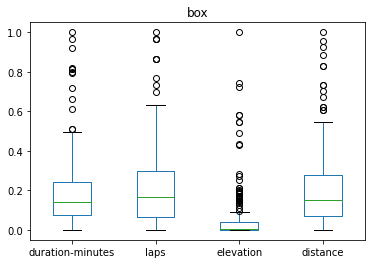

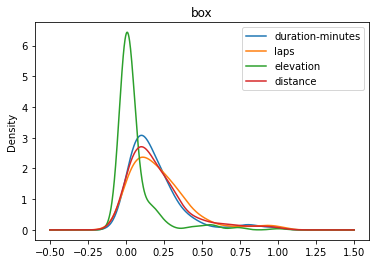

In [21]:
df_metrics_n.plot.box(title='box')
df_metrics_n.plot.kde(title='box')